In [44]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =1, stratify= y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [36]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # 마커와 컬러맵 설정
    markers = ('s','x','o','^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계를 그린다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], 
                   alpha=0.8, c=colors[idx],
                   marker=markers[idx], label = cl,
                   edgecolor = 'black')
        
        #테스트 샘플 부각하기
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            
            plt.scatter(X_test[:,0], X_test[:, 1],
                       facecolors='none', edgecolor='black', alpha = 1.0,
                       linewidth=1, marker = 'o',
                       s=100, label = 'test set')

In [37]:
import matplotlib.pyplot as plt
import numpy as np

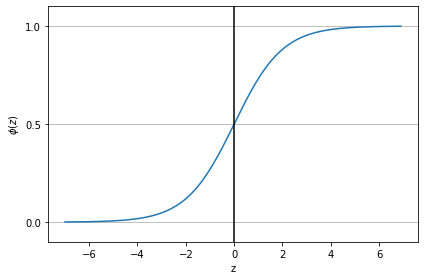

In [38]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color = 'k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z $)')

# Y축 눈금과격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

- 클래스 레이블을 예측하는 것 외에 클래스에 소속될 확률을 추정하는 것이 유용한 경우도 존재
- 어떤날에 비가오는지 예측하는 것, 비 올 확률을 예측해야 하는 날씨 예보에 Logistic Regression 을 사용함.
- 어떤 증상이 있는 환자가 특정 질병을 가질 확률을 예측하는 데 Logistic Regression 을 사용할 수 있음.

In [39]:
def cost_1(z):
    return - np.log(sigmoid(z))

In [40]:
def cost_0(z):
    return -np.log(1-sigmoid(z))

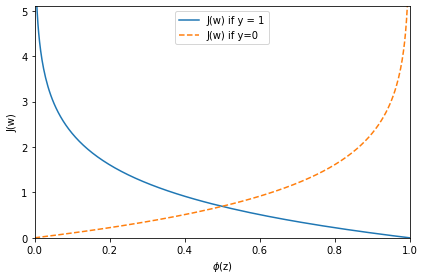

In [41]:
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y = 1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [53]:
class LogisticRegressionGD(object):
    """
    Logistic Regression Gradient Descent
    
    Parameter
    -----------------
    eta : float
     학습률 : (0.0 과 1.0 사이) 
    n_iter : int
     훈련 데이터셋 반복 횟수
    random_state : int
     가중치 무작위 초기화를 위한 난수 생성기 시드
     
     
    Attribution
    ----------------------
    w_ : 1d_arr
     학습된 가중치
    cost_ : list
     epoch 마다 누적된 cost function 값
    
    """
    
    def __init__(self, eta = 0.05, n_iter = 100, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        훈련 데이터 학습
        
        Parameter
        _______________
        X : {arr-like}, shape = [n_samples, n_features]
         n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : arr-like, shape = [n_samples]
         타깃 값
         
        Return
        ________________
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale = 0.01, size=1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            #여기서 SSE 대신 Logistic Cost 를 계산
            cost = (-y.dot(np.log(output)) - ((1-y).dot(np.log(1-output))))
            self.cost_.append(cost)
            
        return self
    
    def net_input(self, X):
        """ 최종 입력 계산 """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        """ 로지스틱 시그모이드 활성화 계산 """
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        """ 단위 계단 함수를 사용하여 클래스 레이블을 반환합니다 """
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

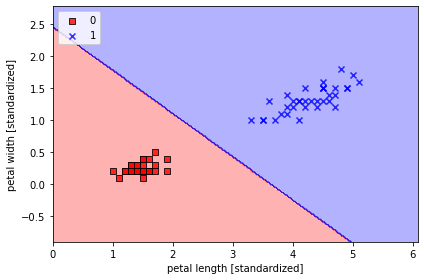

In [54]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta = 0.05, n_iter = 1000, random_state = 1)
lrgd.fit(X_train_01_subset,y_train_01_subset)
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [55]:
from sklearn.linear_model import LogisticRegression

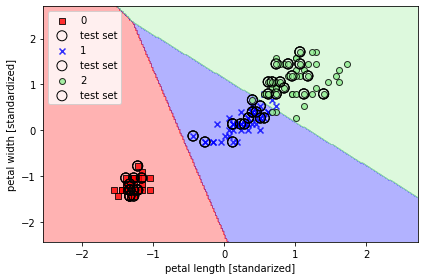

In [56]:
lr = LogisticRegression(solver='liblinear', multi_class = 'auto', C=100.0, random_state = 1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standarized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [57]:
lr.predict_proba(X_test_std[:3, :])

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

In [58]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

In [59]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [62]:
lr.predict(X_test_std[0, :].reshape(1,-1))

array([2])